 1. Загрузить файл hr.csv.
 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
 3. Рассчитать и визуализировать корреляционную матрицу для переменных.
 4. Визуализировать несколько взаимосвязей между переменными.
 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
 6. Рассчитать сколько работников работает в каждом департаменте.
 7. Показать распределение сотрудников по зарплатам.
 8. Показать распределение сотрудников по зарплатам совместно с департаментами.
 9. Сколько сотрудников покинули компанию.
 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
 11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете


In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

 1. Загрузить файл hr.csv.

In [2]:
data = pd.read_csv("hr.csv")
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
desc_table = data.describe()

# не хватает только моды
def calc_mode(fd) :
    mode_ = None
    try :
        mode_ = statistics.mode(fd)
    except statistics.StatisticsError :
        # исключение возникает когда нельзя однозначно выбрать моду, это бывает в тех случаях 
        # когда максимальное количество с одним значением принимают несколько групп чисел (> 1)
        pass
    return mode_
    
desc_table = desc_table.append(pd.Series({ x : calc_mode(data[x]) for x in desc_table.columns }, name="mode"))
desc_table

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode,0.100000,0.550000,4.000000,NaN,3.000000,0.000000,0.000000,0.000000


 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

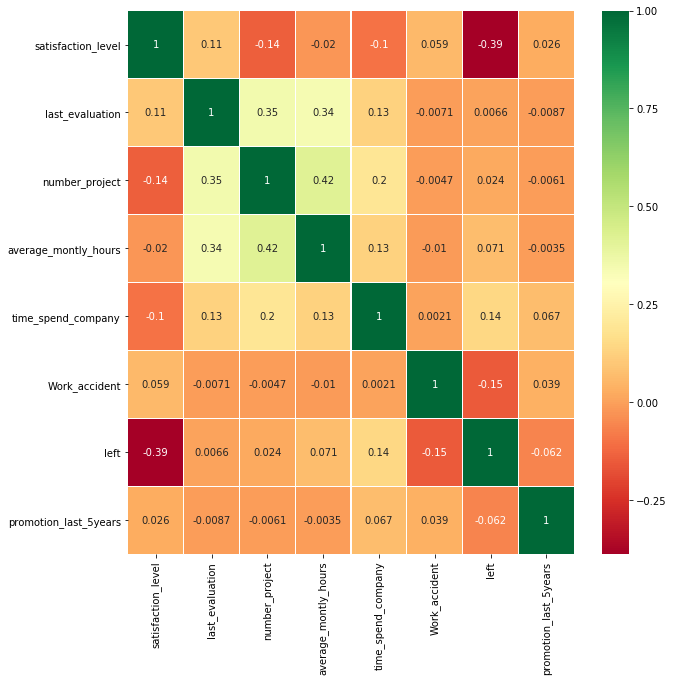

In [4]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.gcf().set_size_inches(10, 10)
plt.show()


из матрицы корелляции видим что больше всего коррелируют значения number_projects и average_montly_hours, left и statisfaction_level а также average_montly_hours и last_evaluation 

 4. Визуализировать несколько взаимосвязей между переменными.

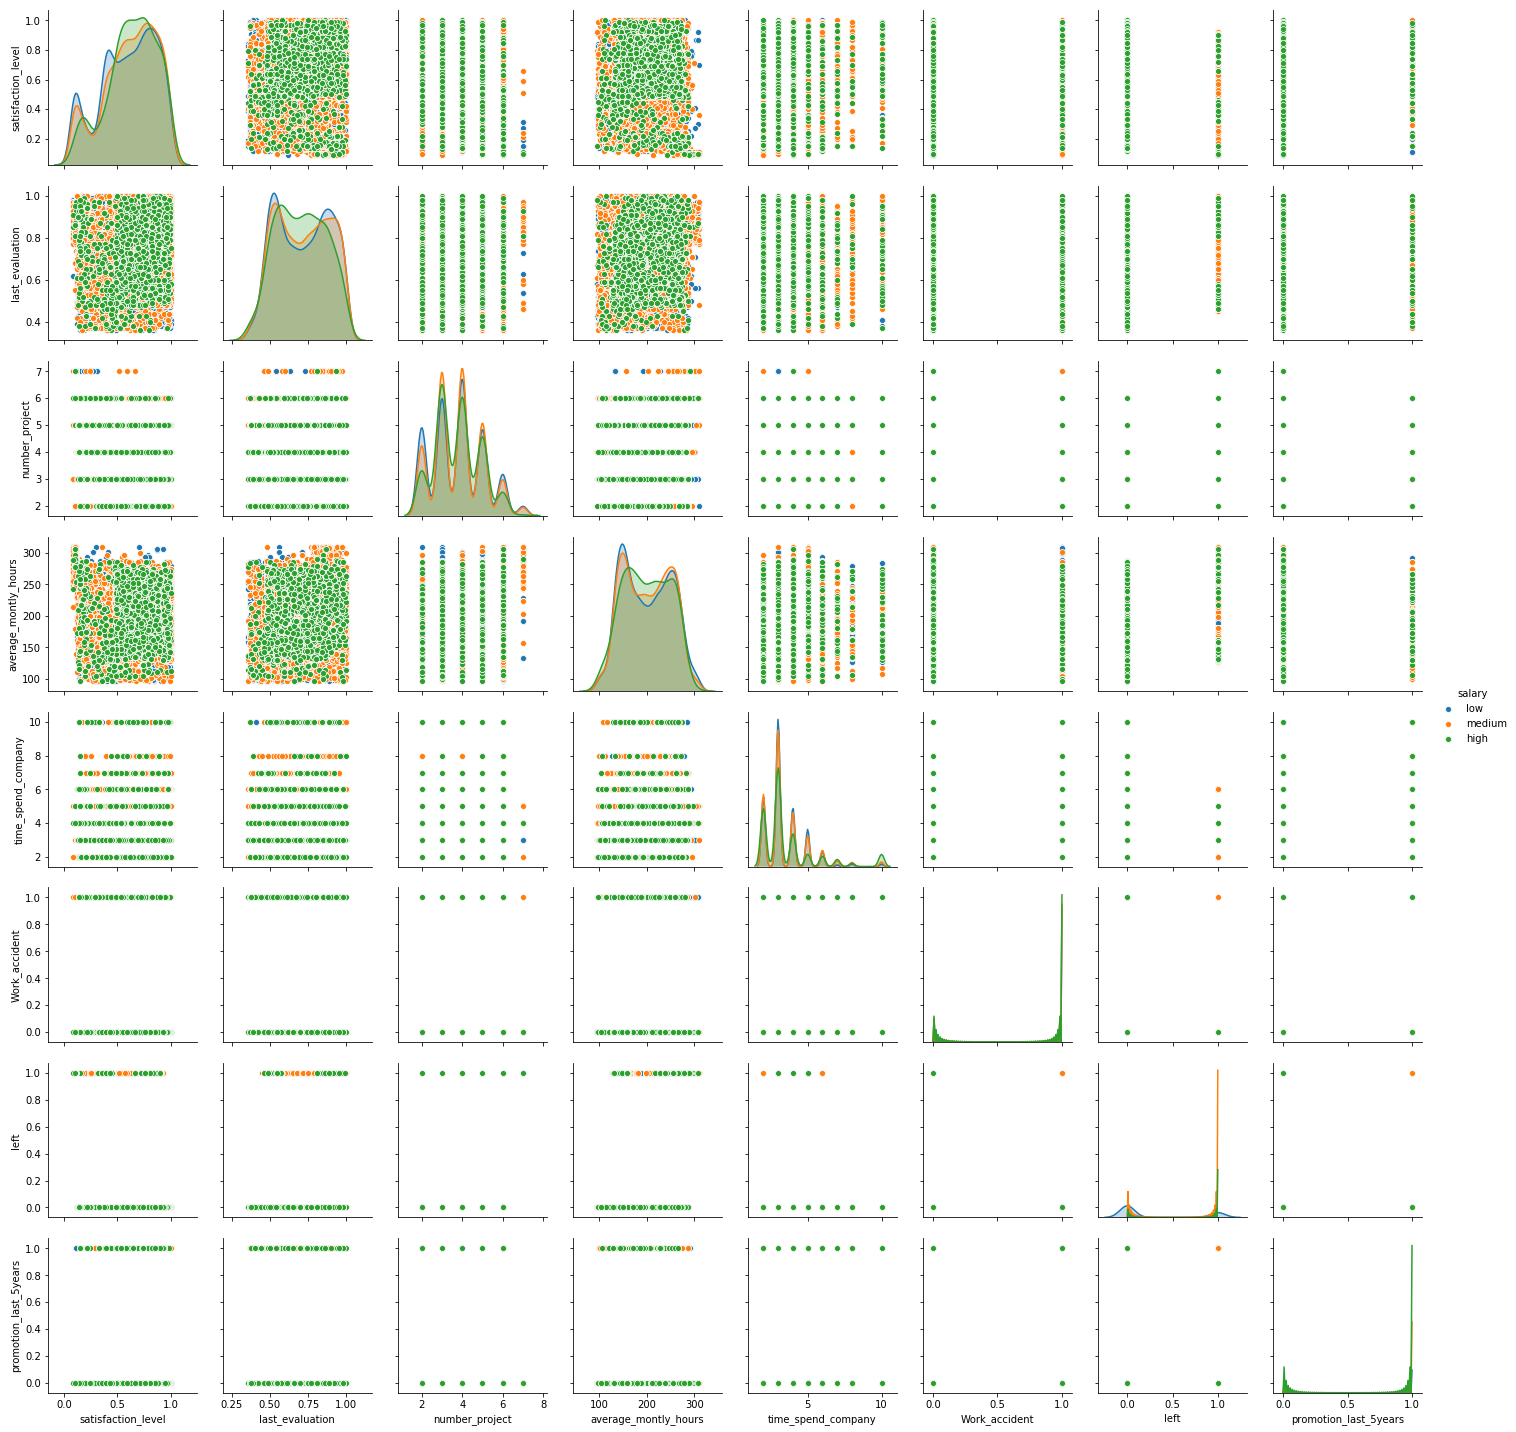

In [5]:
sns.pairplot(data, hue='salary')
plt.show()

очень четко прослеживается гранулярность некоторых значений таких как number_projects, time_spend_company, также видны бинарные переменные work_accident, left и promotion_last_5years

 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

- делаем предположение что значительной разницы в уровене удовлетворенности нет если в последние 5 лет было повышение и если не было. 

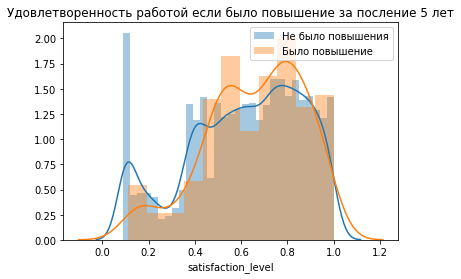

Ttest_indResult(statistic=-3.1366967917856816, pvalue=0.0017119316267238923)

In [6]:
sl0 = data[data['promotion_last_5years']==0]['satisfaction_level']
sl1 = data[data['promotion_last_5years']==1]['satisfaction_level']
sns.distplot(sl0)
sns.distplot(sl1)
plt.title('Удовлетворенность работой если было повышение за посление 5 лет')
plt.legend(['Не было повышения', 'Было повышение'])
plt.show()
stats.ttest_ind(sl0, sl1)

значение p гораздо меньше 0.05 что дает основание отвергнуть наше предположение - повышение в последние 5 лет **влияет** на уровень удовлетворенности

- делаем предположение что наличие нечастного случая на работе как то влияет на оценку работника

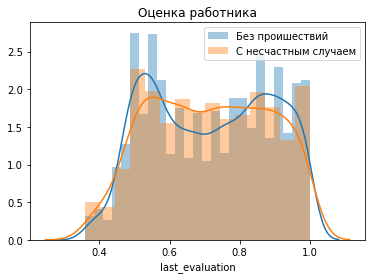

Ttest_indResult(statistic=0.8700290350249095, pvalue=0.38429846201039486)

In [7]:
le0 = data[data['Work_accident']==0]['last_evaluation']
le1 = data[data['Work_accident']==1]['last_evaluation']
sns.distplot(le0)
sns.distplot(le1)
plt.title('Оценка работника')
plt.legend(['Без проишествий', 'С несчастным случаем'])
plt.show()
stats.ttest_ind(le0, le1)

Значение pvalue значительно больше порога значимости (0.05) это значит что наличие несчастного случая не влияет на оценку работника

 6. Рассчитать сколько работников работает в каждом департаменте.

In [8]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

видим что больше всего людей работают в продажах (sales), далее идут технические специалисты (technical) и меньше всего в менеджменте (management)

 7. Показать распределение сотрудников по зарплатам.

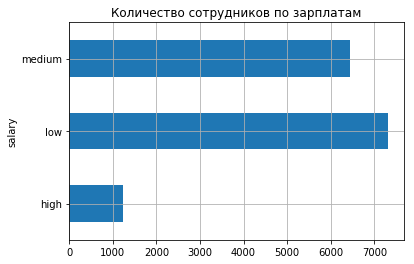

In [9]:
salary_dist = data.groupby('salary').count()

salary_dist.plot.barh(y=[salary_dist.columns[0]], legend=False, title="Количество сотрудников по зарплатам")
plt.grid()
plt.show()

большая часть работников получает низкую зарплату

 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

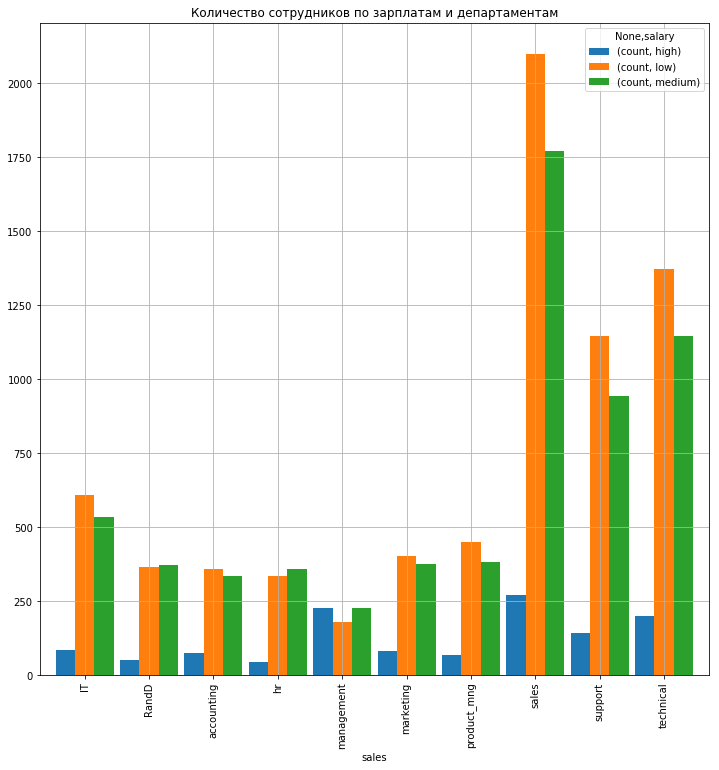

In [10]:
salary_sales_dist = data.groupby(['sales','salary']).count()
columns_to_drop = [salary_sales_dist.columns[x] for x in range(1, len(salary_sales_dist.columns))]
salary_sales_dist.drop(columns_to_drop, axis=1, inplace=True)
salary_sales_dist.rename(columns={salary_sales_dist.columns[0] : 'count'}, inplace=True)
salary_sales_dist
unstacked = salary_sales_dist.unstack()
unstacked
unstacked.plot.bar(legend=True, title="Количество сотрудников по зарплатам и департаментам", width=0.9)
plt.grid()
plt.gcf().set_size_inches(12,12)
plt.show()

а вот из этого графика видно что в самом многочисленном отделе (sales) больше всего высоких зарплат, а в самом малочисленном (manegement) самые низкие зарплаты 

 9. Сколько сотрудников покинули компанию.

In [11]:
data[data.left==1].count()[0]

3571

 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

- выдвигаем гипотезу что удовлетворенность не отличается у работников работающих и уволившихся

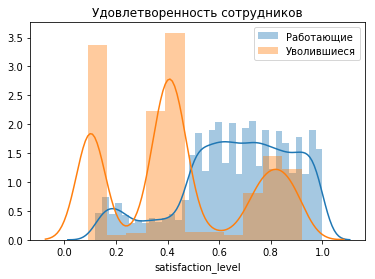

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [12]:
works = data[data.left==0]
left = data[data.left==1]

slw = works.satisfaction_level
sll = left.satisfaction_level
sns.distplot(slw)
sns.distplot(sll)
plt.legend(['Работающие', 'Уволившиеся'])
plt.title("Удовлетворенность сотрудников")
plt.show()
stats.ttest_ind(slw, sll)

pvalue в нуле, удовлетворенность сильно влияет на желание работников уволиться

- делаем предположение что количество рабочих часов влияет на желание уволиться

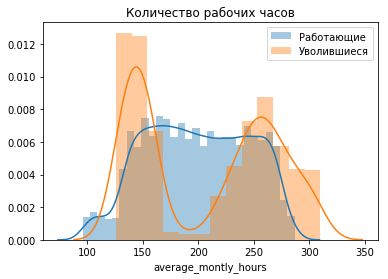

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)

In [13]:
amhw = works.average_montly_hours
amhl = left.average_montly_hours
sns.distplot(amhw)
sns.distplot(amhl)
plt.legend(['Работающие', 'Уволившиеся'])
plt.title("Количество рабочих часов")
plt.show()
stats.ttest_ind(amhw, amhl)

наше предположение неверно, время работы не влияет

 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете